In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import h5py
import itertools
import python_utils_jjm as utils_jjm
from tqdm import tqdm
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/johnmarshall/caiman_data/post_cnmfe_analysis')
import miniscope_analysis as ma 
import scipy.spatial.distance as dist
from tqdm import tqdm

In [4]:
reload(utils_jjm)

<module 'python_utils_jjm' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/python_utils_jjm.py'>

In [5]:
dir_ = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/'
mouse = 'GRIN018'

In [7]:
analysis_df = pd.read_hdf(str(dir_ + mouse + '_aligned_to_behavior.h5'))
coms_df = pd.read_hdf(str(dir_ + mouse + '_coms.h5'))

In [8]:
# get indicies where mouse is moving above a given speed 
# analysis_df['behavior'][analysis_df['behavior']['velocity'] > 0.1].index.tolist()

In [10]:
# 
num_neurons = len(analysis_df['C_z_scored'].columns)

In [11]:
num_neurons

49

In [12]:
#analysis_file = h5py.File(str(dir_ + mouse + '_cluster_analysis.h5'), 'w')

In [13]:
# get euclidean distances  
pairwise_euclidean_distance = {}
for pair in itertools.combinations(range(num_neurons),2):
    pairwise_euclidean_distance[pair] = dist.euclidean(coms_df.iloc[pair[0]], coms_df.iloc[pair[1]])    

pairwise_distance = pd.DataFrame(pairwise_euclidean_distance, index=['euclidean_distance'])
pairwise_distance.to_hdf(dir_ + mouse + '_euclidean_distance.h5', key='df')

In [15]:
# get linear pairwise correlation coefficients
pairwise_r_correlation_unbinned = {}
for pair in tqdm(itertools.combinations(range(num_neurons),2)):
    pairwise_r_correlation_unbinned[pair] = stats.pearsonr(analysis_df['C_z_scored'][pair[0]], analysis_df['C_z_scored'][pair[1]])[0]

pairwise_pearson = pd.DataFrame(pairwise_r_correlation_unbinned, index=['pairwise_pearson_r'])
pairwise_pearson.to_hdf(dir_ + mouse + '_pairwise_pearson.h5', key='df')

1176it [00:11, 100.85it/s]


In [16]:
#plot pairwise correlations versus distance 

In [17]:
stats.pearsonr(analysis_df['C_z_scored'][0], analysis_df['C_z_scored'][1])[0]

0.0786361558848544

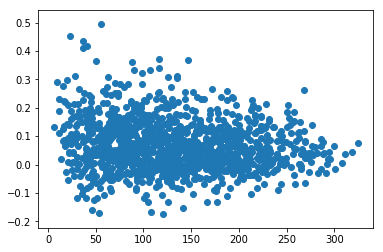

In [18]:
plt.scatter(pairwise_distance, pairwise_pearson)
plt.show()